In [1]:
import pandas as pd # library for data analysis
import requests # library to query a website
from bs4 import BeautifulSoup # library to parse HTML documents

### Step 1 : Fetch the web page and convert the html page into text with the help of Python request library

In [2]:
# import the python request 
# specify the url we want to scrape from
Link = "https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"

# convert the web page to text
result = requests.get(Link)
print(result.text)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of cities in India by population - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c3d0f59d-aac6-4499-be08-466bd80fff76","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_in_India_by_population","wgTitle":"List of cities in India by population","wgCurRevisionId":1093226458,"wgRevisionId":1093226458,"wgArticleId":4021386,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead external links from Ma

### Step 2 : In order to fetch useful information, convert Link_text (which is of string data type) into BeautifulSoup object. Import BeautifulSoup library from bs4

In [3]:
print(result.status_code)# status code 200 means, You are allowed to scrap the data from this webiste

200


In [4]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(result.text, 'html.parser') # Instead of html, lxml can be used as well

### Step 3 : With the help of the prettify() function, make the indentation proper

In [5]:
# make the indentation proper
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of cities in India by population - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c3d0f59d-aac6-4499-be08-466bd80fff76","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_in_India_by_population","wgTitle":"List of cities in India by population","wgCurRevisionId":1093226458,"wgRevisionId":1093226458,"wgArticleId":4021386,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["All articles with dead external links","Articles with dead exte

### Step 4 : To fetch the web page title, use soup.title

In [6]:
# To take a look at the title of the web page
print(soup.title)

<title>List of cities in India by population - Wikipedia</title>


### Step 5 : We want only the string part of the title, not the tags

In [7]:
# Only the string not the tags
print(soup.title.string)

List of cities in India by population - Wikipedia


## Step 6 : Fetch the table tag

In [8]:
pop_table=soup.find('table', class_='wikitable sortable')

In [9]:
print(pop_table)

<table class="wikitable sortable" style="width:100%; text-align:center;">
<caption>
</caption>
<tbody><tr>
<th style="width:5%;">Rank
</th>
<th style="width:15%;">City
</th>
<th style="width:25%;">Population<br/>(2011)<sup class="reference" id="cite_ref-Cities1Lakhandabove_3-0"><a href="#cite_note-Cities1Lakhandabove-3">[3]</a></sup>
</th>
<th style="width:25%;">Population<br/>(2001)
</th>
<th style="width:30%;">State or union territory
</th></tr>
<tr>
<td>1</td>
<td><b><a href="/wiki/Mumbai" title="Mumbai">Mumbai</a></b></td>
<td>12,442,373</td>
<td>11,978,450</td>
<td><a href="/wiki/Maharashtra" title="Maharashtra">Maharashtra</a>
</td></tr>
<tr>
<td>2</td>
<td><b><a href="/wiki/Delhi" title="Delhi">Delhi</a></b></td>
<td>11,007,835</td>
<td>9,879,172</td>
<td><a href="/wiki/Delhi" title="Delhi">Delhi</a>
</td></tr>
<tr>
<td>3</td>
<td><b><a href="/wiki/Bangalore" title="Bangalore">Bangalore</a> </b></td>
<td>8,425,970</td>
<td>4,301,326</td>
<td><a href="/wiki/Karnataka" title="Karn

# Convert the table into a dataframe

In [10]:
df=pd.read_html(str(pop_table))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.head()

,Rank,City,Population(2011)[3],Population(2001),State or union territory
0,1,Mumbai,12442373,11978450,Maharashtra
1,2,Delhi,11007835,9879172,Delhi
2,3,Bangalore,8425970,4301326,Karnataka
3,4,Hyderabad,6809970,3637483,Telangana
4,5,Ahmedabad,5570585,3520085,Gujarat


### Drop the unwanted the columns

In [11]:
# drop the unwanted columns
data = df.drop(["Rank", "Population(2001)"], axis=1)
# rename columns for ease
data = data.rename(columns={"State or union territory": "State","Population(2011)[3]": "Population"})
print(data.head())

        City Population        State
0     Mumbai   12442373  Maharashtra
1      Delhi   11007835        Delhi
2  Bangalore    8425970    Karnataka
3  Hyderabad    6809970    Telangana
4  Ahmedabad    5570585      Gujarat


In [12]:
import re
def remove_square(string):
    return re.sub("\[.*?\]","",string)

In [13]:
data["Population"]=data["Population"].apply(remove_square)

In [14]:
import string
def remove_punctuations(text):
    for punc in string.punctuation:
        text=text.replace(punc,'')
    return text

In [15]:
data['Population']=data['Population'].apply(remove_punctuations)

In [16]:
data['Population']=data["Population"].astype("int")

In [17]:
data.loc[data['Population'].idxmax()]

City               Mumbai
Population       12442373
State         Maharashtra
Name: 0, dtype: object

In [18]:
data.loc[data['Population'].idxmin()]

City          Vasco Da Gama
Population           100000
State                   Goa
Name: 322, dtype: object

In [19]:
data.sort_values(by='Population',ascending=False)

,City,Population,State
0,Mumbai,12442373,Maharashtra
1,Delhi,11007835,Delhi
2,Bangalore,8425970,Karnataka
3,Hyderabad,6809970,Telangana
4,Ahmedabad,5570585,Gujarat
...,...,...,...
318,Tezpur,102505,Assam
319,Jehanabad[35],102456,Bihar
320,Aurangabad[36],101520,Bihar
321,Gangtok,100286,Sikkim


In [92]:
import requests
from glob import glob
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
from time import sleep

Link = 'https://www.amazon.in/s?k=headphones+wireless&crid=AEBXR8SENW3F&sprefix=headphones%2Caps%2C283&ref=nb_sb_ss_ts-doa-p_1_10'
# http://www.networkinghowtos.com/howto/common-user-agent-list/
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:53.0) Gecko/20100101 Firefox/53.0',
            'Accept-Language': 'en-US, en;q=0.5'})

In [96]:
# fetch the url
page = requests.get(Link, headers=HEADERS)

In [97]:
print(page.status_code)# status code 200 means, You are allowed to scrap the data from this webiste

200


In [ ]:
page.content

In [99]:
# create the object that will contain all the info in the url
soup = BeautifulSoup(page.content, features="lxml")

In [100]:
soup.find('title').string

'Amazon.in : headphones wireless'

In [101]:
print(soup.find("span",class_ ="a-price-whole").get_text().strip())

1,599


In [102]:
# Rating
soup.find(class_="a-icon-alt").get_text().strip()

'3.9 out of 5 stars.'

# Section 3 : Retrieve data from News API

In [103]:
import os
import requests 
from newsapi import NewsApiClient

### Part 2 : Init

In [104]:
newsapi_key = os.environ['NEWS_API_KEY']
newsapi = NewsApiClient(api_key=newsapi_key)

### Part 3 : Headline

#### 3.1 Headline with url

In [105]:
import requests
url = ('http://newsapi.org/v2/top-headlines?'
        'country=us&category=health&'
        f'apiKey={newsapi_key}') # The direct URL to the article.
response = requests.get(url)
# print(response.json())

In [106]:
response.json()['articles']

[{'source': {'id': None, 'name': 'New York Post'},
  'author': 'Patrick Reilly',
  'title': 'Monkeypox spreading locally at large LA County events, health officials say - New York Post ',
  'description': 'On Saturday, the US surpassed 200 confirmed cases nationwide, 51 of which are in California, according to the CDC’s latest data.',
  'url': 'https://nypost.com/2022/06/25/monkeypox-spreading-at-large-la-events-health-officials-say/',
  'urlToImage': 'https://nypost.com/wp-content/uploads/sites/2/2022/06/monkeypox-la.jpg?quality=75&strip=all&w=1024',
  'publishedAt': '2022-06-26T01:20:00Z',
  'content': 'The number of confirmed monkeypox cases in Los Angeles County has jumped to 22, which health officials said has largely been spread among men who have sex with other men who have recently attended la… [+2198 chars]'},
 {'source': {'id': None, 'name': 'NBC Chicago'},
  'author': None,
  'title': 'First Probable Case of Monkeypox Reported in Suburban Cook County - NBC Chicago',
  'descr

#### 3.2 Headline with parameters

In [107]:
top_headlines = newsapi.get_top_headlines(q='COVID-19',   # Keywords or a phrase to search for.
#                                           sources ='times of india',  #A comma-seperated string of identifiers for the news sources or blogs you want headlines from. Use the /sources endpoint to locate these programmatically or look at the sources index. Note: you can't mix this param with the country or category params.                                          
                                          category='health',                                
                                          country='in',
                                          language='en')

In [108]:
for ttl in top_headlines['articles']:
    print("title :", ttl['title'])

title : Women more likely to get long Covid than men - Times of India
title : UC San Diego: Researchers Continue Study of COVID-19 Vaccinations, Pregnancy and Postpartum - India Education Diary
title : COVID-19 Vaccination Prevented Over 42 Lakh Deaths In India In 2021: Lancet Study - Jagran English
title : Similar mortality for patients with COVID-19 on dialysis, kidney recipients with COVID-19 - Healio
title : Coronavirus: Do you have a COVID cough? Experts reveal the best sleeping position for relief - Times of India


#### 3.3 Parameter explanation



    """Constants and allowed parameter values specified in the News API."""

    TOP_HEADLINES_URL = "https://newsapi.org/v2/top-headlines"
    EVERYTHING_URL = "https://newsapi.org/v2/everything"
    SOURCES_URL = "https://newsapi.org/v2/sources"

    #: The 2-letter ISO 3166-1 code of the country you want to get headlines for.  If not specified,
    #: the results span all countries.
    countries = { "ae",     "ar",
        "at",
        "au",
        "be",
        "bg",
        "br",
        "ca",
        "ch",
        "cn",
        "co",
        "cu",
        "cz",
        "de",
        "eg",
        "es",
        "fr",
        "gb",
        "gr",
        "hk",
        "hu",
        "id",
        "ie",
        "il",
        "in",
        "is",
        "it",
        "jp",
        "kr",
        "lt",
        "lv",
        "ma",
        "mx",
        "my",
        "ng",
        "nl",
        "no",
        "nz",
        "ph",
        "pk",
        "pl",
        "pt",
        "ro",
        "rs",
        "ru",
        "sa",
        "se",
        "sg",
        "si",
        "sk",
        "th",
        "tr",
        "tw",
        "ua",
        "us",
        "ve",
        "za",
        "zh",
    }

    #: The 2-letter ISO-639-1 code of the language you want to get articles for.  If not specified,
    #: the results span all languages.
    languages = {"ar", "en", "cn", "de", "es", "fr", "he", "it", "nl", "no", "pt", "ru", "sv", "se", "ud", "zh"}

    #: The category you want to get articles for.  If not specified,
    #: the results span all categories.
    categories = {"business", "entertainment", "general", "health", "science", "sports", "technology"}

    #: The order to sort article results in.  If not specified, the default is ``"publishedAt"``.
    sort_method = {"relevancy", "popularity", "publishedAt"}

### Part 4 : Everything

In [109]:
import requests
url = ('https://newsapi.org/v2/everything?'
        'q=apple&'
        'from=2022-06-25&'
        'to=2022-06-25&'
        'sortBy=popularity&'
        'apiKey=50ee14aa955d4930857e4e69477175bc') # The direct URL to the article.
response = requests.get(url)
# print(response.json())

In [110]:
response.json()['articles'][2]['content']

'Apple this week rolled out its second developer betas of iOS 16, macOS Ventura, and related operating system updates, delivering some initial tweaks compared to the first beta. We should see the firs… [+4090 chars]'

In [111]:
for ttl in response.json()['articles']:
    print("title :", ttl['title'])

title : US senators ask FTC to investigate Apple and Google over mobile tracking
title : Google says attackers worked with ISPs to deploy Hermit spyware on Android and iOS
title : Top Stories: What's New in iOS 16 Beta 2, M2 MacBook Pro Review, and More
title : El acoplador acústico o cómo se conectaban a internet los abuelos de tus abuelos
title : La crisis de Netflix no cesa: así puede reinventarse la plataforma en el futuro
title : Why Sports Are a Game-Changer for Streaming
title : Suns basketball operations executive announces he is gay
title : How will we know when an AI actually becomes sentient?
title : VirtualBuddy: Virtualize macOS 12 and later on Apple Silicon
title : 中央銀行になりきって適切な金利を設定し村のGDPを増やすマニアック経済シミュ「Sim CB」をプレイしてみた
title : WSJ: Lawmakers call FTC to investigate Apple and Google over mobile tracking
title : Apple @ Work: Apple’s stronghold on the MDM APIs ensures that no third-party company can interfere with a great device experience in the workplace
title : AirPods P

In [112]:
all_articles = newsapi.get_everything(q='chennai',  # Keywords or a phrase to search for.
                                     # sources='Engadget',   #A comma-seperated string of identifiers for the news sources or blogs you want headlines from. Use the /sources endpoint to locate these programmatically or look at the sources index. Note: you can't mix this param with the country or category params.
                                     # domains='bbc.co.uk,techcrunch.com',   # A comma-seperated string of domains (eg bbc.co.uk, techcrunch.com, engadget.com) to restrict the search to.
                                      from_param='2022-06-25',   # A date and optional time for the oldest article allowed. This should be in ISO 8601 format (e.g. 2020-12-16 or 2020-12-16T11:03:47)
                                      to='2022-06-25',   # A date and optional time for the newest article allowed. This should be in ISO 8601 format (e.g. 2020-12-16 or 2020-12-16T11:03:47)
                                     language='en',   # The 2-letter ISO-639-1 code of the language you want to get headlines for.
                                      sort_by='popularity',  # The order to sort the articles in. Possible options: relevancy, popularity, publishedAt
                                      page=1 )   #  Use this to page through the results if the total results found is greater than the page size.
                                      #apiKey = 8cfb35124315407c9af7d5ecc271a4de)

In [113]:
print(all_articles)

{'status': 'ok', 'totalResults': 21, 'articles': [{'source': {'id': None, 'name': 'The Indian Express'}, 'author': 'Express Web Desk', 'title': 'Chennai power cut: These areas in Chennai will face a power cut today', 'description': 'Chennai power disruption June 25, Saturday: Parts of Chennai will face a power cut from 9 am to 2 pm for maintenance work today.', 'url': 'https://indianexpress.com/article/cities/chennai/chennai-power-cut-these-areas-in-chennai-will-face-a-power-cut-today-7989816/', 'urlToImage': 'https://images.indianexpress.com/2022/06/electricity-reuters-1200-2-1-15.jpeg', 'publishedAt': '2022-06-25T01:30:09Z', 'content': 'The Tamil Nadu Generation and Distribution Corporation (Tangedco) has announced that power will be suspended in parts of Chennai today in Tambaram, Guindy, Porur, KK Nagar, Avadi, Perambur, Ponneri/s… [+978 chars]'}, {'source': {'id': None, 'name': 'The Indian Express'}, 'author': 'Aksheev Thakur', 'title': 'Garuda Aerospace to set up drone factory in

In [114]:
all_articles['articles'][0]['description']

'Chennai power disruption June 25, Saturday: Parts of Chennai will face a power cut from 9 am to 2 pm for maintenance work today.'

In [115]:
all_articles['articles'][2]

{'source': {'id': None, 'name': 'Hindustan Times'},
 'author': 'HT Entertainment Desk',
 'title': "Gauri Khan shares ‘beautiful note’ on Shah Rukh Khan's 30 years at movies - Hindustan Times",
 'description': '<ol><li>Gauri Khan shares ‘beautiful note’ on Shah Rukh Khan\'s 30 years at movies\xa0\xa0Hindustan Times\r\n</li><li>"Deepika And I Started Looking The Same": Shah Rukh Khan\'s ROFL Explanation Of The "Only Issue" With His Pathaan Hairstyle\xa0\xa0NDTV\r\n</li><li>Entertainme…',
 'url': 'https://www.hindustantimes.com/entertainment/bollywood/gauri-khan-shares-note-on-shah-rukh-khan-s-30-years-at-movies-101656162640709.html',
 'urlToImage': 'https://images.hindustantimes.com/img/2022/06/25/1600x900/srk_gauri_1635482034449_1656162920555.jpg',
 'publishedAt': '2022-06-25T13:36:21Z',
 'content': 'Interior designer, film producer and Shah Rukh Khans wife, Gauri Khan gave a shoutout to the actor with a sweet note. As Shah Rukh clocked 30 years in the film industry, Gauri shared the mo

### Part 5 : sources

#### 5.1 Sources with url

In [116]:
import requests
url = ('https://newsapi.org/v2/sources?'
        'language=en&'
        'country=us&'
        'apiKey=50ee14aa955d4930857e4e69477175bc') # The direct URL to the article.
response = requests.get(url)
# print(response.json())

In [117]:
# /v2/sources
sources = newsapi.get_sources(language='en',
          country='us')
# print(sources)

##### In the overall sentiment , we acn see the statust is ok ; implies the available overrall content has a neutral sentiment.Let's verify the validity of the claim.

##### Now, we will perform a sentiment analysis and sentiment intesity test for the content. 

# Section 4 : Sentiment Analysis

### Part 1 : Convert the available content into a dataframe and remove the null data

In [118]:
import requests
url = ('https://newsapi.org/v2/everything?'
        'q=apple&'
        'from=2022-06-20&'
        'to=2022-06-25&'
        'sortBy=popularity&'
        'apiKey=50ee14aa955d4930857e4e69477175bc') # The direct URL to the article.
allnews = requests.get(url)
# print(allnews.json())

In [119]:
all_articles=allnews.json()['articles']

In [120]:
len(all_articles)

100

In [121]:
AllContent = []
for i in range(len(all_articles)):
  #print(everything[i]['content'])
  AllContent.append(all_articles[i]['description'])

In [122]:
import pandas as pd
AllContent = pd.DataFrame(AllContent,columns = ['description'])
AllContent

,description
0,Your Apple Watch comes with accessibility feat...
1,Polestar promised Apple CarPlay support for it...
2,"Say hello to Apple's most baffling laptop, the..."
3,iOS 16 might just help you avoid the CAPTCHA a...
4,A group of Democratic senators is urging the F...
...,...
95,Fund overlap occurs when an investor owns mult...
96,Planters Bank is a CDFI in Tennesee and Missis...
97,Golden Bank is an Asian American-owned financi...
98,Security Federal Bank is a CDFI in Georgia and...


In [123]:
AllContent = AllContent.dropna(axis = 0, how = 'any')
AllContent

,description
0,Your Apple Watch comes with accessibility feat...
1,Polestar promised Apple CarPlay support for it...
2,"Say hello to Apple's most baffling laptop, the..."
3,iOS 16 might just help you avoid the CAPTCHA a...
4,A group of Democratic senators is urging the F...
...,...
95,Fund overlap occurs when an investor owns mult...
96,Planters Bank is a CDFI in Tennesee and Missis...
97,Golden Bank is an Asian American-owned financi...
98,Security Federal Bank is a CDFI in Georgia and...


### Part 2 : Assign the subjetivity response to the content

In [124]:
# TextBlob - Python library for processing textual data
from textblob import TextBlob

In [125]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [126]:
AllContent['Subjectivity'] = AllContent['description'].apply(lambda x: getTextSubjectivity(str(x)))
AllContent['Subjectivity'] 

0     0.266667
1     0.700000
2     0.451515
3     0.375000
4     0.000000
        ...   
95    0.062500
96    0.400000
97    0.280000
98    0.400000
99    0.000000
Name: Subjectivity, Length: 100, dtype: float64

### Part 3 : Assign the polarity response to the content

In [127]:
def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [128]:
AllContent['Polarity'] = AllContent['description'].apply(lambda x: getTextPolarity(str(x)))
AllContent['Polarity']

0     0.600000
1     0.200000
2     0.112121
3     0.000000
4     0.000000
        ...   
95    0.000000
96   -0.250000
97    0.140000
98   -0.250000
99    0.000000
Name: Polarity, Length: 100, dtype: float64

### Part 4 : Assing sentiment to the content

In [129]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [130]:
AllContent['Score'] = AllContent['Polarity'].apply(getTextAnalysis)

### Part 5 : Assign Polarity to the entire content

In [131]:
positive = AllContent[AllContent['Score'] == 'Positive']

print(str(positive.shape[0]/(AllContent.shape[0])*100) + " % of positive news")

68.0 % of positive news


### Part 6 : Visualize the frequency distribution of the sentiment on each content


<BarContainer object of 3 artists>

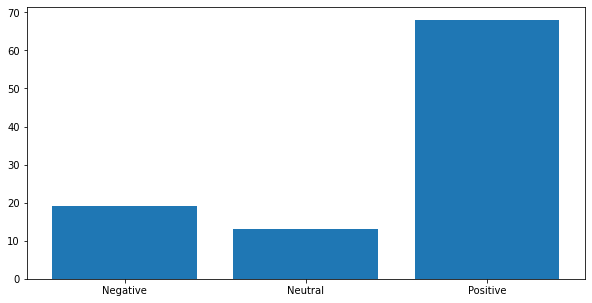

In [132]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
labels = AllContent.groupby('Score').count().index.values

values = AllContent.groupby('Score').size().values

plt.bar(labels, values)

### Part 7 : Construct a complete vocabulary for the entire content

In [133]:
# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

words = str()
for content in AllContent['description']:
  words = words + ' ' + content 
print(words)

 Your Apple Watch comes with accessibility features that are must-haves for people with disabilities, but many of them can be useful for anyone—if you know how to use them and where to find them. Here are some of the best accessibility features of the Apple Wa… Polestar promised Apple CarPlay support for its EVs two years ago, and it's finally delivering. As The Vergeexplains, the car brand has released an over-the-air update for the Polestar 2 that makes CarPlay available on the Android Automotive-based sedan. If y… Say hello to Apple's most baffling laptop, the 13-inch MacBook Pro with an M2 chip. It was already a confusing computer when we reviewed the M1 model in 2020 andit was out-shined by the fan-less MacBook Air. But now that there's a new MacBook Air with a bigge… iOS 16 might just help you avoid the CAPTCHA anti-bot systems that stand between you and some web sign-ins. As MacRumorsnoticed, Apple used WWDC 2022 to detail a Private Access Token system in iOS 16, iPadOS 16 and m

### Part 8 : Visualise the complete vocabulary as per their intensity over the entire content available

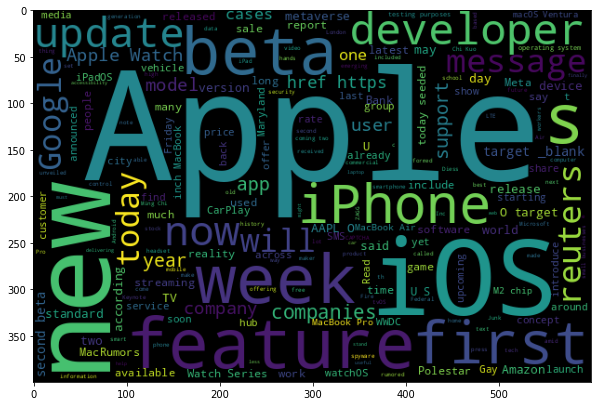

In [134]:
# Creating a word cloud
plt.figure(figsize=(10,10))
words = ' '.join([content for content in AllContent['description']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()